2.1. Problem Statement: Machine Learning 7
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

In [22]:
import pandas as  pd
with open("C:/Users/pragupta/Desktop/Submission/DataSet/nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [23]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [24]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [25]:
nba.columns 

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [26]:
nba["season_end"].unique()

array([2013], dtype=int64)

In [27]:
nba.drop(["player","season","season_end"],axis =1,inplace=True)

In [28]:
nba.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,...,0.836,94,183,277,40,23,46,63,187,328


In [29]:
nba.drop(["bref_team_id"],axis =1 ,inplace=True)

In [30]:
nba.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [31]:
dummy=pd.get_dummies(nba["pos"])

In [32]:
dummy.head()

,C,F,G,PF,PG,SF,SG
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0


In [33]:
nba =pd.concat([nba,dummy],axis =1 )

In [34]:
nba.head(2)

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,tov,pf,pts,C,F,G,PF,PG,SF,SG
0,SF,23,63,0,847,66,141,0.468,4,15,...,30,122,171,0,0,0,0,0,1,0
1,C,20,81,20,1197,93,185,0.503,0,0,...,71,203,265,1,0,0,0,0,0,0


In [35]:
nba.columns 

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'C', 'F', 'G', 'PF',
       'PG', 'SF', 'SG'],
      dtype='object')

In [36]:
nba.drop(["pos"],axis =1 ,inplace =True)

In [37]:
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,tov,pf,pts,C,F,G,PF,PG,SF,SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,30,122,171,0,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,71,203,265,1,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,NaN,...,39,108,362,0,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,146,136,1330,0,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,63,187,328,1,0,0,0,0,0,0


In [38]:
nba.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
C        0
F        0
G        0
PF       0
PG       0
SF       0
SG       0
dtype: int64

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [41]:
import seaborn as sns

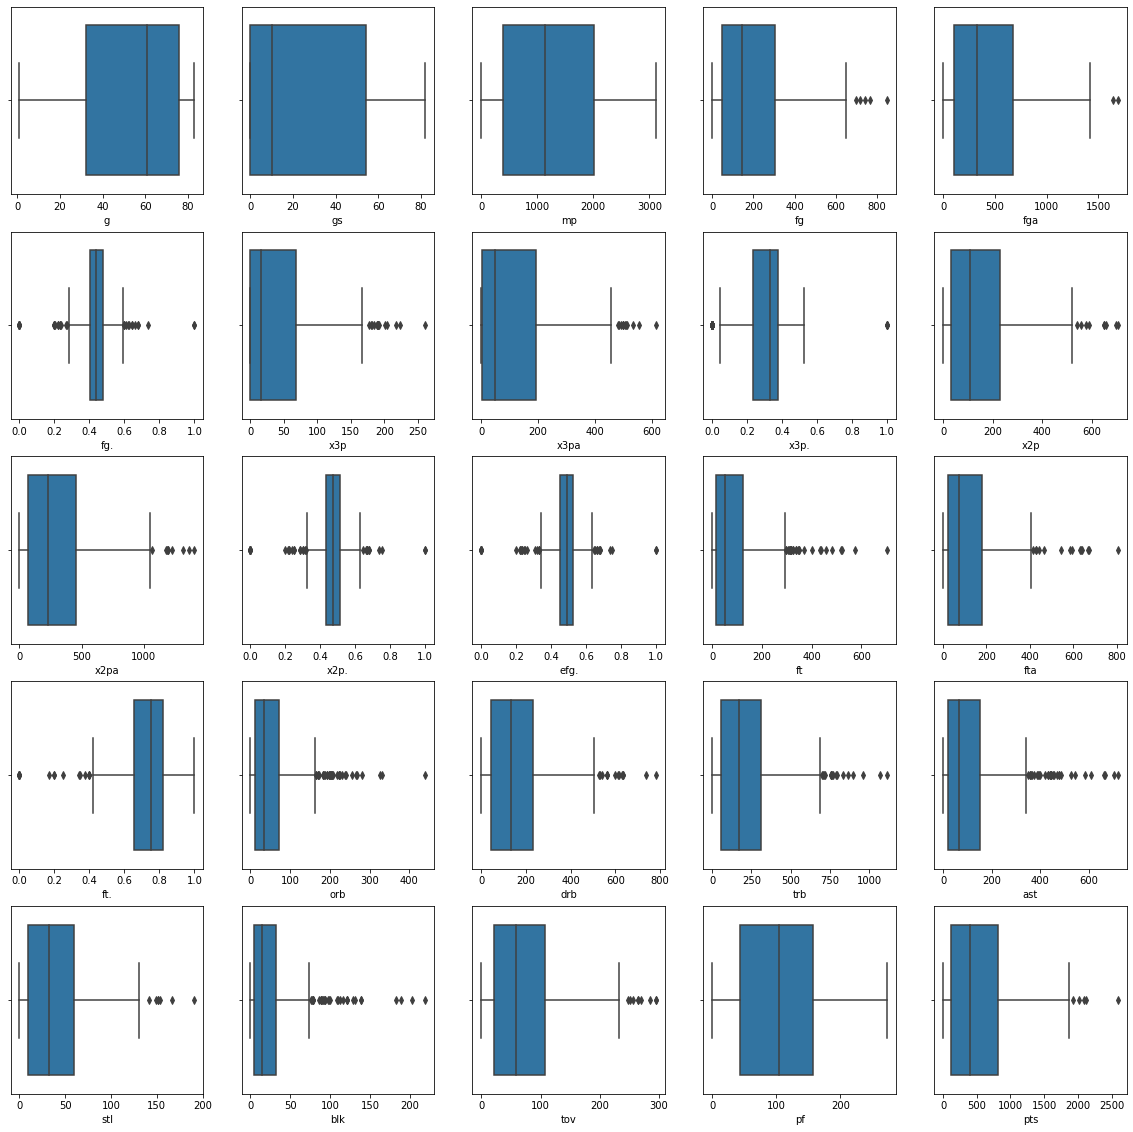

In [58]:

plt.figure(figsize=(20,20))
for i in range(1,26):
    plt.subplot(5, 5, i)
    sns.boxplot(nba[nba.columns[i]])
    
    

In [45]:
nba.columns[:-7]

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [62]:
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,tov,pf,pts,C,F,G,PF,PG,SF,SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,30,122,171,0,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,71,203,265,1,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,NaN,...,39,108,362,0,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,146,136,1330,0,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,63,187,328,1,0,0,0,0,0,0


In [63]:
nba.isnull().sum()

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
C        0
F        0
G        0
PF       0
PG       0
SF       0
SG       0
dtype: int64

In [73]:
for i in nba.columns:
    if nba[i].isnull().sum() > 0:

        nba[i].fillna(nba[i].median(),inplace=True)
     

In [74]:
nba.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
pts     0
C       0
F       0
G       0
PF      0
PG      0
SF      0
SG      0
dtype: int64

In [75]:
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,tov,pf,pts,C,F,G,PF,PG,SF,SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,30,122,171,0,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,71,203,265,1,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,39,108,362,0,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,146,136,1330,0,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,63,187,328,1,0,0,0,0,0,0


In [79]:
X = nba[[i for i in nba.columns if i != 'pts']]

In [80]:
Y=nba["pts"]

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.3,random_state =9)

In [90]:
kmodel =KNeighborsClassifier(n_neighbors=5)
kmodel.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
Y_pred=kmodel.predict(X_test)

In [93]:
confusion_matrix(Y_test,Y_pred)

array([[3, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [94]:
Y_pred

array([ 100,    0,  303,  170,   73,  132,  171,  350,  257,  988,  760,
         15, 1068,  859,  137,   65, 1106,   75,   63,  588,  343,  419,
          3,  572,  211,  240,  349,   25,  588, 1106,   64,  257,   11,
        660,  490,  419,  666,  961,    0,  403, 1248,   75,   47,    0,
          6,  715,  529,   25,    0,  761, 1791,  603,   76,  721,  403,
        921,  144,  159,  109,  248,  988,  144,  588,  257,  646,  286,
        339,  350,  781, 1167,  646, 1264,    3,   15,   75,   82,   25,
       1249,  100,  715,  871,  222,  257,  178,    3,  303,  401,  124,
       1012,  100,  100,  499,  761,  257,  511,  417,  988,  350,  301,
        716,    0,  781,  403,  716,  499,  252,  820,  911,  257,  178,
        257,   25,  701,  525,   14,  257,  761,  403,  760,   76,  716,
        403,    0, 1106, 1248,  343,  261,  339,  525,  525,   14,  173,
         19,   47,  252,   26,  990,    0,  810,  343, 1289,  124,  303,
         75,   97], dtype=int64)

2.2. Problem Statement: Machine Learning 8

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.

Hint:
from bs4 import BeautifulSoup
import urllib.request
import nltk

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [21]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
import requests

# response = urllib.request.urlopen('http://php.net/')
# html = response.read()
# soup = BeautifulSoup(html,"html5lib")

In [30]:
# response = urllib.request.urlopen('http://php.net/')
# html = response.read()
# # soup = BeautifulSoup(html,"html5lib")
# soup=BeautifulSoup(html.content)

In [22]:
r =requests.get('http://php.net/')

In [24]:
soup = BeautifulSoup(r.content)


In [25]:
soup

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>PHP: Hypertext Preprocessor</title>
<link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
<link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
<link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
<link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>
<link href="https://www.php.net/index.php" rel="canonical"/>
<link href="https://www.php.net/index" rel="shorturl"/>
<link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>
<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="/cached.

In [26]:
text = (''.join(s.findAll(text=True))for s in soup.findAll('p'))


In [32]:
soup.get_text()

"\n\n\n\nPHP: Hypertext Preprocessor\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDownloads\nDocumentation\nGet Involved\nHelp\n\n\n\n\n\n\n\n\n\nGetting Started\nIntroduction\nA simple tutorial\nLanguage Reference\nBasic syntax\nTypes\nVariables\nConstants\nExpressions\nOperators\nControl Structures\nFunctions\nClasses and Objects\nNamespaces\nErrors\nExceptions\nGenerators\nReferences Explained\nPredefined Variables\nPredefined Exceptions\nPredefined Interfaces and Classes\nContext options and parameters\nSupported Protocols and Wrappers\n\n\nSecurity\nIntroduction\nGeneral considerations\nInstalled as CGI binary\nInstalled as an Apache module\nSession Security\nFilesystem Security\nDatabase Security\nError Reporting\nUsing Register Globals\nUser Submitted Data\nMagic Quotes\nHiding PHP\nKeeping Current\nFeatures\nHTTP authentication with PHP\nCookies\nSessions\nDealing with XForms\nHandling file uploads\nUsing remote files\nConnection handling\nPersistent Database Connections\

In [27]:
text

<generator object <genexpr> at 0x0000015256228B48>

In [29]:
from collections import Counter
from string import punctuation
c = Counter((x.rstrip(punctuation).lower() for y in text for x in y.split()))
print (c.most_common())

[('the', 504), ('php', 231), ('for', 182), ('in', 156), ('release', 148), ('of', 146), ('can', 114), ('be', 109), ('found', 104), ('is', 100), ('and', 92), ('this', 92), ('on', 85), ('please', 75), ('version', 73), ('file', 68), ('you', 65), ('upgrading', 60), ('a', 55), ('or', 55), ('to', 47), ('changes', 45), ('downloads', 44), ('source', 43), ('test', 43), ('list', 42), ('also', 38), ('team', 37), ('visit', 37), ('page', 37), ('bug', 35), ('read', 35), ('next', 32), ('news', 31), ('development', 30), ('wiki', 30), ('do', 30), ('not', 30), ('use', 30), ('production', 30), ('it', 30), ('download', 30), ('carefully', 30), ('report', 30), ('any', 30), ('system', 30), ('information', 30), ('new', 30), ('features', 30), ('other', 30), ('complete', 30), ('notes', 30), ('these', 30), ('files', 30), ('archive', 30), ('planned', 30), ('thank', 30), ('helping', 30), ('us', 30), ('make', 30), ('better', 30), ('more', 29), ('site', 26), ('windows', 25), ('glad', 25), ('announce', 25), ('cycle', 